# Polynomial Regression Algorithm


What will you do if your data is a bit more complicated than a straight line? A good alternative for you is that you can use a linear model to fit in a nonlinear data. You can use the add powers of ever feature as the new features, and then you can use the new set of features to train a Linear Model

First generate a nonlinear data which is based on a quadratic equation. A quadratic equation is in the form of ax2+bx+c; I will first import all the necessary libraries then I will create a quadratic equation:

In [19]:
# Python ≥3.5 is required
import sys


# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np
import numpy.random as rnd
np.random.seed(42)

let’s make a quadratic equation:

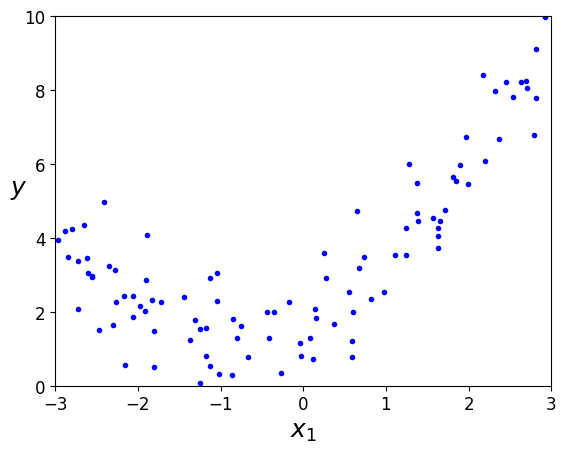

In [20]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("quadratic_data_plot")
plt.show()

Polynomial Regression

A straight line will never fit on a nonlinear data like this. Now, I will use the Polynomial Features algorithm provided by Scikit-Learn to transfer the above training data by adding the square all features present in our training data as new features for our model:


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [22]:
X_poly[0]


array([-0.75275929,  0.56664654])

Now X_poly contains the original features of X plus the square of the features. Now we can use the Linear Regression algorithm to fit in our new training data:

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

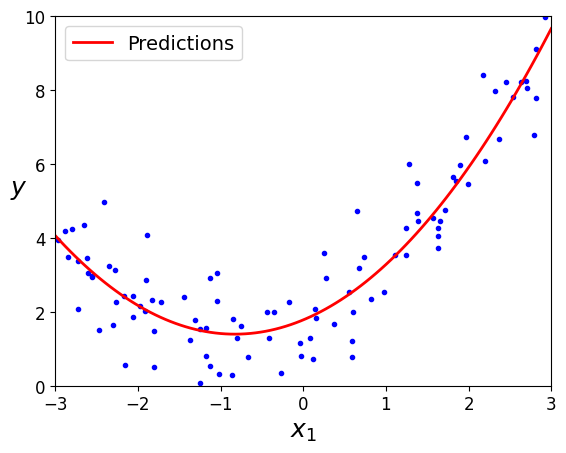

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.savefig("quadratic_predictions_plot")
plt.show()

when we have multiple features, the Polynomial Regression is very much capable of finding the relationships between all the features in the data. This is possible because the Polynomial Features adds all the combinations of features up to a provided degree.

Learning Curves in Polynomial Regression

If you use a high-degree Polynomial Regression, you will end up fitting the training data in a much better way than a Linear Regression. Let’s understand this with an example:

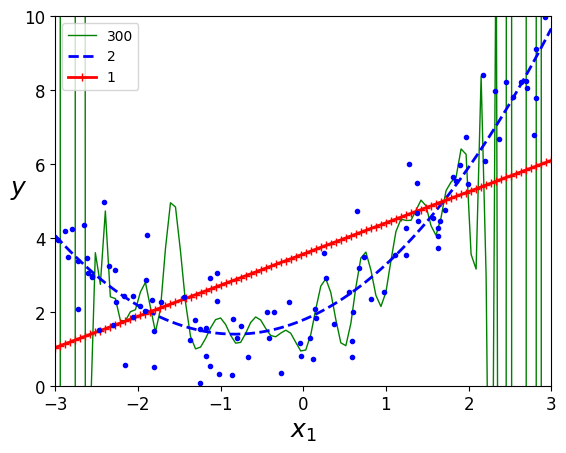

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("high_degree_polynomials_plot")
plt.show()

The high-degree Polynomial Regression model is overfitting the training data, where a linear model is underfitting it. So the model that will perform the best, in this case, is quadratic because the data is generated using a quadratic equation.


But you never know, what function is used in creating the data. So how you will decide how complex your model should be? How to analyse whether your model is overfitting or underfitting the data?

A right way to generalise the performance of our model is to look at the learning curves. Learning curves are plots of the performance of a model on the training set and the validation set as a function of the size of the training set.


To generate learning curves, train the model several times on different size of subsets of the training data. Now let’s understand this with an example. The code below defines a function that can plot the learning curves of a model by using the training data:

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 

The learning curves of our model using the function that I created above:

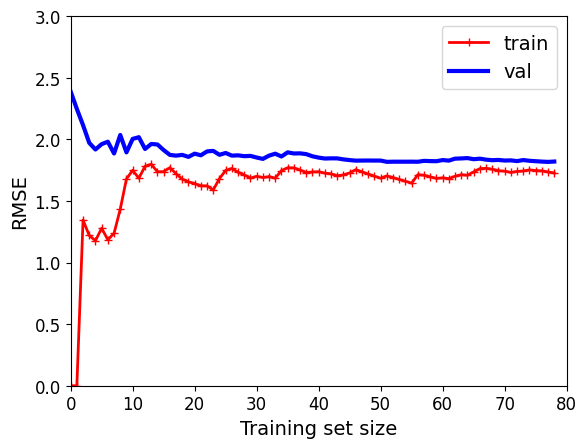

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.savefig("underfitting_learning_curves_plot")   
plt.show()

So the output resulted in underfitting data. If your data is underfitting the training data, adding more instances will not help. You need to use a more sophisticated machine learning model or come up with some better features. Now let’s look at the learning curves of a 10th-degree polynomial regression model on the same data:

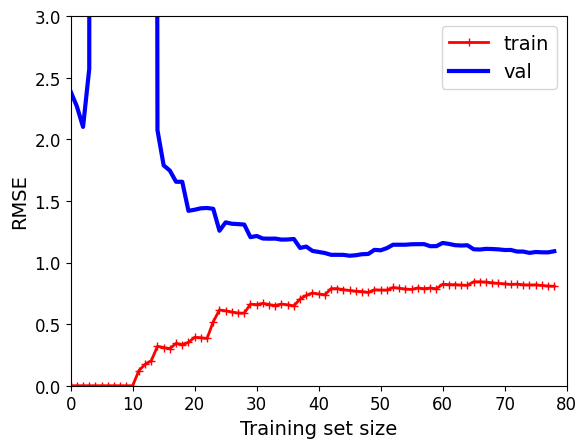

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.savefig("learning_curves_plot")  
plt.show()  

The learning rate are looking a bit likely to the previous ones, but there are some major differences here:


The error on the training data is very much lower than the previous learning curves we explored using a linear regression model.
There is a gap between the curves, which means that the performance of the model is very much better on the training data than the validation data.